# Task 1

In [25]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Get the mean, std of the pixel intensity values
def get_mean_and_std():
  # Get unnormalized data with pixel values [0,1]
  dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
  )

  # Split into 60_000/1_000 = 60 batches for faster processing
  loader = DataLoader(dataset, batch_size=1000, shuffle=False)
  mean, std, num_batches = 0.0, 0.0, 0

  for images, _ in loader:
    batch_samples = images.size(0)

    # Convert 28x28 arrray to 784x1
    images = images.view(batch_samples, -1)

    # Get mean and std for pixel values of the batch
    mean += images.mean(dim=1).sum()
    std += images.std(dim=1).sum()
    num_batches += batch_samples

  mean /= num_batches
  std /= num_batches

  return mean.item(), std.item()

In [27]:
# Get the train and test datasets loaders
def get_datasets(is_cnn = False):
  # Get the normalization mean and std
  mean, std = get_mean_and_std()

  # Convert and Normalize the data to a tensor (pixel values between 0 and 1) and flatten it to a 784 element list
  ds_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,)),
    transforms.Lambda(lambda x: x.view(-1))
  ])

  # Same as before but keep the 28x28 structure if its a CNN
  if is_cnn:
    ds_transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((mean,), (std,)),
    ])

  # Get the transformed train and test datset
  complete_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=ds_transform)
  complete_test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=ds_transform)

  train_loader = DataLoader(complete_train_dataset, batch_size=100, shuffle=True)
  test_loader = DataLoader(complete_test_dataset, batch_size=100, shuffle=False)

  return train_loader, test_loader

In [32]:
# View the first 10 test and training datasets items
def visualize_datasets():
  # Get data
  training_data, testing_data = get_datasets(is_cnn=True)

  # Print the dimensions of the data
  images, labels = next(iter(training_data))
  print(f"Images shape: {images.shape}")
  print(f"Labels shape: {labels.shape}")
  print(f"Labels: {labels[0:10]}")

  # Get a small smaple and plot them
  training_example = [next(iter(training_data)) for i in range(10)]
  testing_example = [next(iter(testing_data)) for i in range(10)]

  plt.figure(figsize=(10, 4))
  for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(training_example[0][0][i].permute(1,2,0), cmap='gray')
    plt.axis('off')
    plt.subplot(2, 10, i + 11)
    plt.imshow(testing_example[0][0][i].permute(1,2,0), cmap='gray')
    plt.axis('off')
  plt.show()

Images shape: torch.Size([100, 1, 28, 28])
Labels shape: torch.Size([100])
Labels: tensor([8, 0, 6, 4, 7, 8, 5, 9, 1, 7])


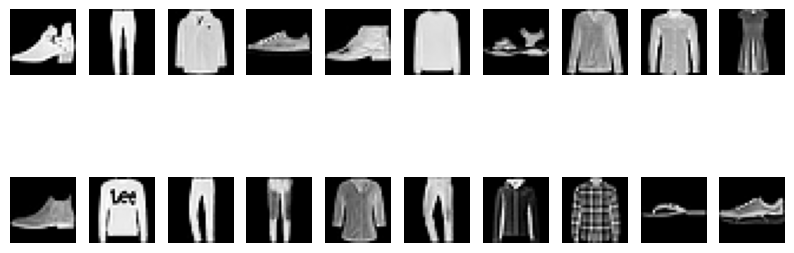

In [33]:
visualize_datasets()